In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import random from random

SyntaxError: invalid syntax (26332866.py, line 5)

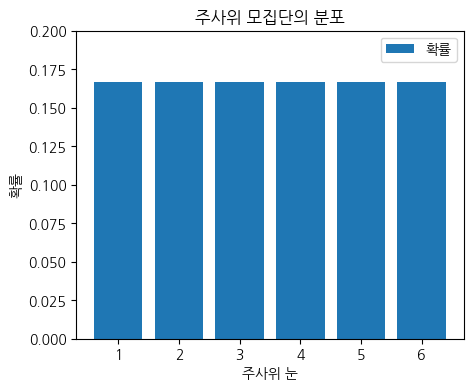

In [3]:
모집단 = [1,2,3,4,5,6]
plt.figure(figsize=(5,4))
plt.hist(모집단, bins=np.arange(1,8) - 0.5, density=True, rwidth=0.8, label='확률')
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 모집단의 분포")
plt.ylim(0, 0.2)
plt.legend()
plt.show()

In [ ]:
sample=[np.random.choice(모집단,size=30).mean() for x in range(100000)]

In [11]:
sample[:10]

[np.float64(4.1),
 np.float64(4.066666666666666),
 np.float64(3.7666666666666666),
 np.float64(3.466666666666667),
 np.float64(3.3),
 np.float64(3.7666666666666666),
 np.float64(3.566666666666667),
 np.float64(2.933333333333333),
 np.float64(3.3333333333333335),
 np.float64(3.8333333333333335)]

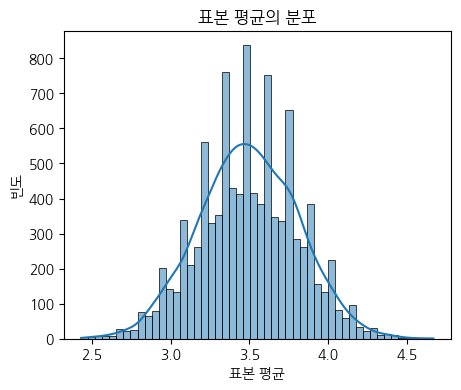

In [ ]:
sample = [np.random.choice(모집단, size=30).mean() for x in range(10000)]
plt.figure(figsize=(5,4))
sns.histplot(sample, kde=True, bins=50)
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.title("표본 평균의 분포")
# plt.ylim(0, 0.2)
# plt.legend()
plt.show()

In [23]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [25]:
raw_df.shape

(1012, 11)

In [27]:
boston_df = pd.read_csv("./house_price.csv")
target = boston_df.pop('MEDV')

In [28]:
boston_df.shape

(506, 14)

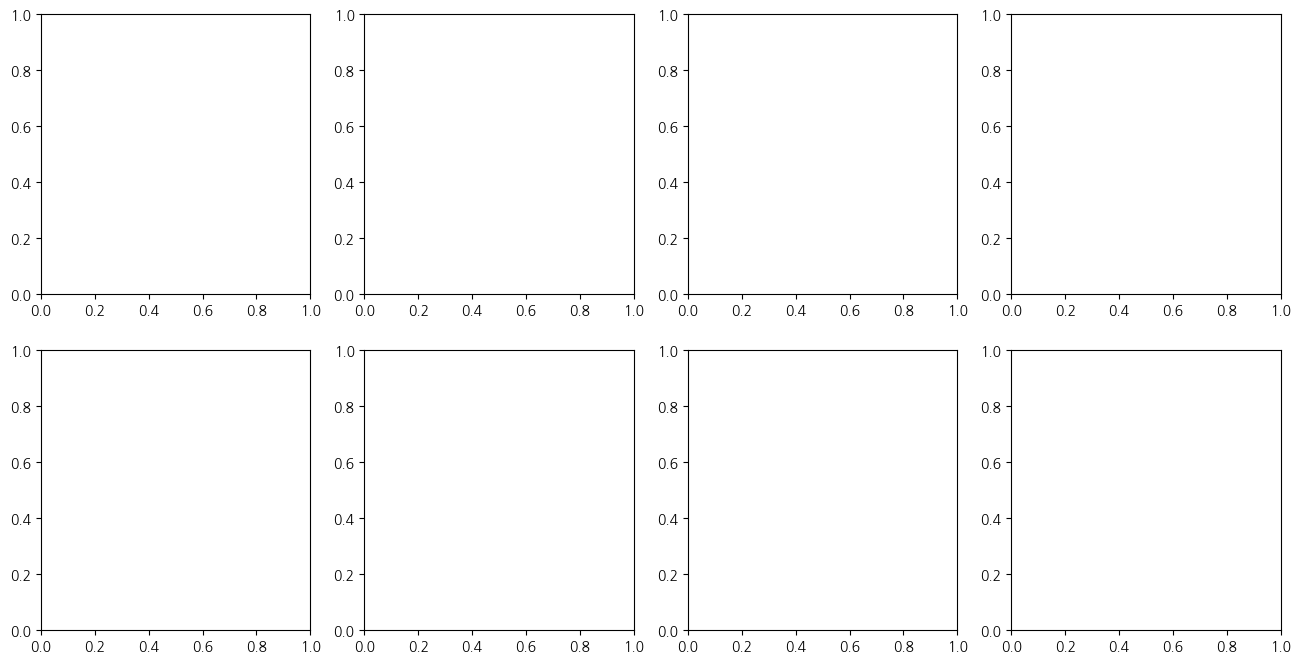

In [29]:
fig,axs=plt.subplots(figsize=(16,8), ncols=4,nrows=2)

In [30]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CAT.MEDV'],
      dtype='object')

In [31]:
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

In [32]:
boston_df[features]

,RM,ZN,INDUS,NOX,AGE,PTRATIO,LSTAT,RAD
0,6.575,18.0,2.31,0.538,65.2,15.3,4.98,1
1,6.421,0.0,7.07,0.469,78.9,17.8,9.14,2
2,7.185,0.0,7.07,0.469,61.1,17.8,4.03,2
3,6.998,0.0,2.18,0.458,45.8,18.7,2.94,3
4,7.147,0.0,2.18,0.458,54.2,18.7,5.33,3
...,...,...,...,...,...,...,...,...
501,6.593,0.0,11.93,0.573,69.1,21.0,9.67,1
502,6.120,0.0,11.93,0.573,76.7,21.0,9.08,1
503,6.976,0.0,11.93,0.573,91.0,21.0,5.64,1
504,6.794,0.0,11.93,0.573,89.3,21.0,6.48,1


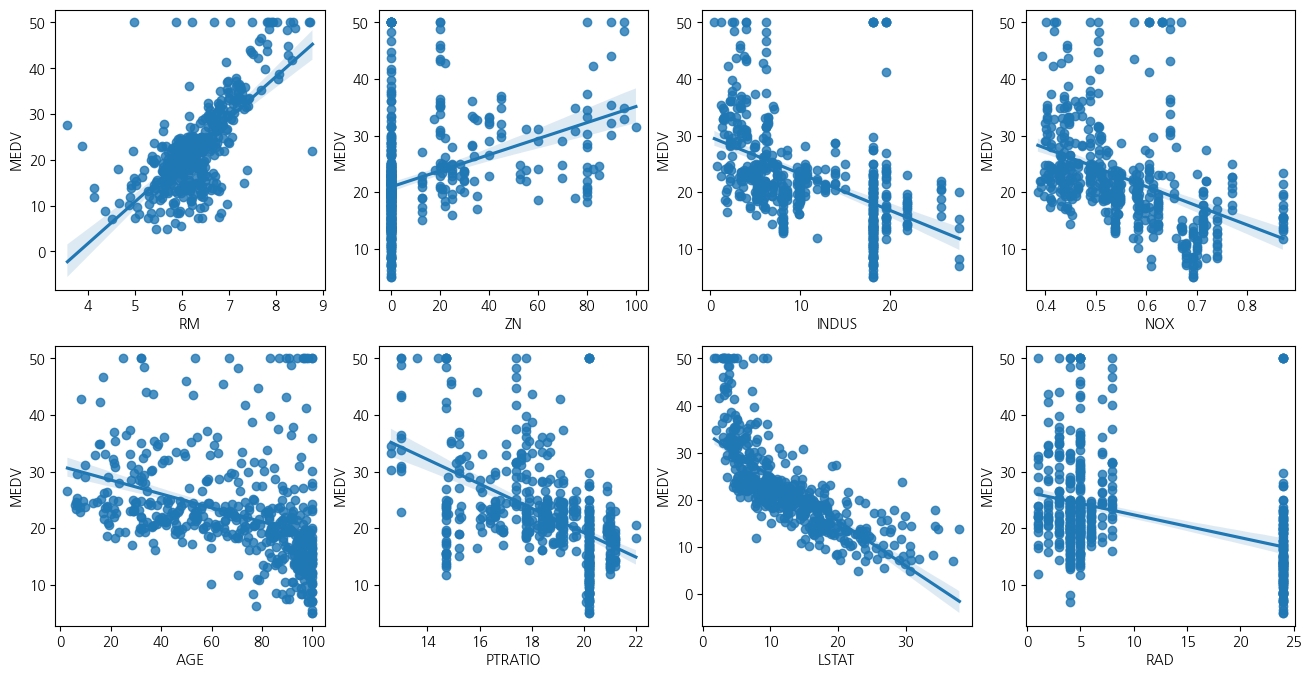

In [33]:
fig,axs=plt.subplots(figsize=(16,8), ncols=4,nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for idx,feature in enumerate(features):
    row=int(idx/4)
    col=idx %4
    sns.regplot(x=feature,y=target,data=boston_df, ax=axs[row][col])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
x_train,x_test, y_train, y_test=train_test_split(boston_df,target,test_size=0.2,random_state=42)

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
lr.coef_

array([-1.16113299e-01, -2.44419488e-02,  1.40236600e-01,  2.43138582e+00,
       -1.42359029e+01,  1.55396232e+00, -1.59083193e-02, -6.40085664e-01,
        1.64048461e-01, -6.51147353e-03, -5.74453060e-01,  9.50612065e-03,
       -4.45964298e-01,  1.16430937e+01])

In [39]:
pd.DataFrame(data=lr.coef_.reshape(-1,14), columns=boston_df.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
0,-0.116113,-0.024442,0.140237,2.431386,-14.235903,1.553962,-0.015908,-0.640086,0.164048,-0.006511,-0.574453,0.009506,-0.445964,11.643094


In [40]:
mean_squared_error(y_test,lr.predict(x_test))

15.626711460817234

In [42]:
r2_score(y_test,lr.predict(x_test))

0.7869097871760689